# 6 - Create supplementary data tables as xlsx files

- creates **supplementary data table 3** about current and past volume changes (+ some regional characteristics from RGI6, such as regional glacier surface slope)
- creates **supplementary data table 1** with steady-state regional glacier mass and response timescale estimates with uncertainties ...
- tables are saved as .xlsx files for the manuscript and then some minor formatting adjustments were manually done


In [2]:
import numpy as np
import pandas as pd

import xarray as xr
import matplotlib.pyplot as plt

In [3]:
DATE = 'Feb12_2024'
pd_lowess_ch = pd.read_csv(f'../data/lowess_fit_rel_2020_101yr_avg_steady_state_{DATE}.csv', index_col=0)

fill_option = 'repeat_last_101yrs' 
fit_to_median = False
path_merged_runs_scaled_extend = f'../data/GMIP3_reg_glacier_model_data/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'

ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)
from help_functions import pal_models, model_order, d_reg_num_name, model_order_anonymous, compute_steady_state_yr
hue_order_anonymous = []

pal_models_l = []
hue_order = []
for m, p in zip(model_order, pal_models):
    if (m!='OGGM-VAS') and (m!='OGGM_v153'):
        hue_order.append(m)
ds_reg_models = ds_reg_models.sel(model_author = hue_order)


In [4]:
df_reg_models_count_models = ds_reg_models.volume_m3.isel(simulation_year=0).to_dataframe()

In [5]:
df_reg_models_count_models = (df_reg_models_count_models.reset_index().dropna().groupby('rgi_reg').count()/80)['model_author']
reg_w_only_glob_models = df_reg_models_count_models.loc[df_reg_models_count_models.values == 4].index
reg_w_5_models = df_reg_models_count_models.loc[df_reg_models_count_models.values == 5].index
reg_w_6_models = df_reg_models_count_models.loc[df_reg_models_count_models.values == 6].index


In [6]:
df = pd.read_csv(f'../data/3_shift_summary_region_characteristics{DATE}.csv', index_col=[0])


All    1.000000
01     0.118157
02     0.005783
03     0.180746
04     0.052456
05     0.097531
06     0.023233
07     0.047753
08     0.001727
09     0.094295
10     0.000794
11     0.000617
12     0.000312
13     0.020151
14     0.018075
15     0.004773
16     0.000500
17     0.031767
18     0.000382
19     0.300945
Name: regional_volume_m3_2020_via_5yravg, dtype: float64

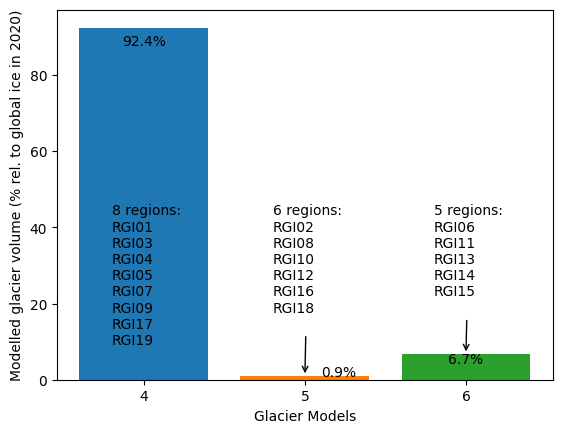

In [7]:

perc_rel_2020_glob_models = 100*df.loc[reg_w_only_glob_models].sum()['regional_volume_m3_2020_via_5yravg'] /df.loc['All','regional_volume_m3_2020_via_5yravg']
perc_rel_2020_5_models = 100*df.loc[reg_w_5_models].sum()['regional_volume_m3_2020_via_5yravg'] /df.loc['All','regional_volume_m3_2020_via_5yravg']
perc_rel_2020_6_models = 100*df.loc[reg_w_6_models].sum()['regional_volume_m3_2020_via_5yravg'] /df.loc['All','regional_volume_m3_2020_via_5yravg']


plt.bar(4, perc_rel_2020_glob_models)
reg_w_only_glob_models_str =  f'{len(reg_w_only_glob_models)} regions:\n'
for r in reg_w_only_glob_models:
    reg_w_only_glob_models_str += f'RGI{r}\n'
plt.annotate(reg_w_only_glob_models_str, (3.8, perc_rel_2020_glob_models*0.5),
            verticalalignment = 'top')
plt.text(4, perc_rel_2020_glob_models*0.95,f'{perc_rel_2020_glob_models.round(1)}%', horizontalalignment='center')



plt.bar(5, perc_rel_2020_5_models)
reg_w_5_models_str = f'{len(reg_w_5_models)} regions:\n'
for r in reg_w_5_models:
    reg_w_5_models_str += f'RGI{r}\n'
plt.annotate(reg_w_5_models_str, xytext=(4.8, perc_rel_2020_glob_models*0.5),
             xy=(5, perc_rel_2020_5_models),
             arrowprops={'arrowstyle' :'->'},
            verticalalignment = 'top')
plt.text(5.1, perc_rel_2020_5_models*1.1,f'{perc_rel_2020_5_models.round(1)}%')

plt.bar(6, perc_rel_2020_6_models)
reg_w_6_models_str = f'{len(reg_w_6_models)} regions:\n'
for r in reg_w_6_models:
    reg_w_6_models_str += f'RGI{r}\n'
plt.annotate(reg_w_6_models_str, xytext=(5.8, perc_rel_2020_glob_models*0.5),
             xy=(6, perc_rel_2020_6_models),
             arrowprops={'arrowstyle' :'->'},
            verticalalignment = 'top')
plt.text(6, perc_rel_2020_6_models*0.65,f'{perc_rel_2020_6_models.round(1)}%', horizontalalignment='center')

plt.xticks([4,5,6])
plt.xlabel('Glacier Models')
plt.ylabel('Modelled glacier volume (% rel. to global ice in 2020)')

df['regional_volume_m3_2020_via_5yravg']/df.loc['All','regional_volume_m3_2020_via_5yravg']

In [8]:
from oggm import utils

df_rgi6g = pd.read_hdf(utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/rgi/rgi62_stats.h5'))
df_rgi6g = df_rgi6g.loc[df_rgi6g.Connect != 2]
for rgi_reg in df_rgi6g.O1Region.unique():
    rgidf = df_rgi6g.loc[df_rgi6g.O1Region == rgi_reg]
    df.loc[rgi_reg, 'RGI v6.0 area (km²)'] = rgidf['Area'].sum()
df.loc['All', 'RGI v6.0 area (km²)'] = df_rgi6g['Area'].sum()

In [9]:
rgi_regs_5000 = ['01', '03', '04', '05', '06','07', '09', '17','19']
df['Simulation time'] = str(2000)
df.loc['All', 'Simulation time'] = ''
for r in rgi_regs_5000:
    df.loc[r,'Simulation time'] = str(5000)

In [10]:
rgi_reg_fig_dict = {'All':'Global',
                    '01':'Alaska (01)',
                    '02':'W Canada & US (02)',
                    '03':'Arctic Canada N (03)',
                    '04':'Arctic Canada S (04)',
                    '05':'Greenland Periphery (05)',
                    '06':'Iceland (06)',
                    '07':'Svalbard (07)',
                    '08':'Scandinavia (08)',
                    '09':'Russian Arctic (09)',
                    '10':'North Asia (10)',
                    '11':'Central Europe (11)',
                    '12':'Caucasus & Middle East (12)',
                    '13':'Central Asia (13)',
                    '14':'South Asia W (14)', # West
                    '15':'South Asia E (15)', # East
                    '16':'Low Latitudes (16)',
                    '17':'Southern Andes (17)',
                    '18':'New Zealand (18)',
                    '19':'Sub- & Antarctic Islands (19)'
                    }


In [11]:
cols_s4 = ['Simulation time', 'rgi_year_weighted_median','RGI v6.0 area (km²)','regional_volume_m3_itmix',
           'regional_volume_m3_2020_via_5yravg', '20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%',
           'slope_weighted_area_avg']
df_s4 = df[cols_s4].copy()
df_s4.loc[:, 'slope_weighted_area_avg'] = df_s4['slope_weighted_area_avg'].round(1)  # do not show NaN
# let's also compute for all glaciers
# df_s4.loc['All', 'slope_weighted_area_avg'] = '' # do not show NaN
df_s4.loc[:,'RGI v6.0 area (km²)'] = df_s4['RGI v6.0 area (km²)'].values.round(0).astype(int)
df_s4.loc[:,'rgi_year_weighted_median'] = df_s4['rgi_year_weighted_median'].values.round(0).astype(int)
df_s4.loc[:,'regional_mass_gt_itmix'] = (df_s4['regional_volume_m3_itmix']*900 *1e-12).round(0).astype(int) # kg/m3 , kg -> Gt
df_s4.loc[:,'regional_mass_gt_2020_via_5yravg'] = (df_s4['regional_volume_m3_2020_via_5yravg']*900 *1e-12).round(0).astype(int) # km3
df_s4.loc[:,'20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%'] = df_s4['20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%'].round(1)
rename_cols = {'rgi_year_weighted_median': r'Year$^a$ (glacier-area weighted median)',
               'RGI v6.0 area (km²)':r'Glacier area$^a$ (km²)',
                'slope_weighted_area_avg':r'Glacier surface slope$^a$ (glacier-area weighted average, °)',
               'regional_mass_gt_itmix':r'Glacier mass$^a$ (Gt)',
               'regional_mass_gt_2020_via_5yravg': r'Glacier mass in 2020$^b$ (Gt)',
               '20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%': r'2000-2019 observed glacier mass loss$^b$ (rel. to 2000, %)',
              'Simulation time':'Simulation time (years)'}
df_s4 = df_s4.rename(columns=rename_cols)
# Transpose the DataFrame
df_s4 = df_s4.T
for r in rgi_reg_fig_dict.keys():
    df_s4 = df_s4.rename(columns = {r:rgi_reg_fig_dict[r]})

# Splitting long column names into multiple rows
f = df_s4.index.str.replace('_','')
df_s4.index = f # df_s4.index.str.split('_').map(tuple)
df_s4 = df_s4.T

In [12]:
df_s4_nice = df_s4.drop(columns=['regionalvolumem3itmix',
                    'regionalvolumem32020via5yravg']).sort_values(by=r'Glacier mass in 2020$^b$ (Gt)',
                                                                  ascending = False)

In [13]:
# make int columns
df_s4_nice[['Year$^a$ (glacier-area weighted median)',
            'Glacier area$^a$ (km²)']] = df_s4_nice[['Year$^a$ (glacier-area weighted median)',
                                                     'Glacier area$^a$ (km²)']].astype(int)

In [14]:
# resort the columns
df_s4_nice = df_s4_nice[list(rename_cols.values())]

In [15]:
df_s4_nice

,Year$^a$ (glacier-area weighted median),Glacier area$^a$ (km²),"Glacier surface slope$^a$ (glacier-area weighted average, °)",Glacier mass$^a$ (Gt),Glacier mass in 2020$^b$ (Gt),"2000-2019 observed glacier mass loss$^b$ (rel. to 2000, %)",Simulation time (years)
Global,2000,705739,11.4,142341,137491,3.9,
Sub- & Antarctic Islands (19),1986,132867,3.6,41820,41377,1.1,5000
Arctic Canada N (03),1999,105111,9.6,25498,24851,2.5,5000
Alaska (01),2010,86725,13.9,17081,16246,8.0,5000
Greenland Periphery (05),2001,89717,10.3,14123,13410,5.3,5000
Russian Arctic (09),2001,51592,11.9,13176,12965,1.7,5000
Arctic Canada S (04),2001,40888,11.5,7750,7212,7.2,5000
Svalbard (07),2008,33959,8.8,6723,6566,3.3,5000
Southern Andes (17),2000,29429,14.9,4806,4368,9.1,5000
Iceland (06),2000,11060,6.7,3393,3194,5.8,5000


In [16]:
df_s4_nice.to_excel('figures/extended_data/table_ED_3.xlsx')

In [17]:
# for the csv table we also add a RGI region column
df_s4_nice_csv = df_s4_nice.copy()
df_s4_nice_csv['rgi_reg'] = [str(s[-3:-1]) for s in df_s4_nice_csv.index.values]
df_s4_nice_csv.loc[df_s4_nice_csv['rgi_reg']=='ba', 'rgi_reg'] = 'global'
df_s4_nice_csv.to_csv('../data/table_S3.csv')

### Steady-states estimates with uncertainties ... 

In [18]:
sim_year = 5000

qs = [0.17,0.5,0.83]

pd_fit_quantiles = pd_lowess_ch
pd_fit_quantiles.index = pd_fit_quantiles.temp_ch.round(2)

for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
    for q in [0.17, 0.83]: 
        q = str(q)
        # just make sure to remove unphysical "up and downs"
        pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg, q] = np.minimum.accumulate(pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg][q].values)

pd_steady_state = pd.DataFrame(index = pd_fit_quantiles.region.unique())
for temp in [1.2, 1.5, 2.0, 2.7, 3.0, 4.0, 5.0]:
    for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
        s = pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg]
        s_t= s.loc[temp]
        v = f'{s_t["0.5"].round(1)} [{s_t["0.17"].round(0).astype(int)}–{s_t["0.83"].round(0).astype(int)}]' 
        pd_steady_state.loc[rgi_reg,f'{temp}°C steady state mass (% rel. to 2020)'] = v

for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
    s = pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg]
    temp_s = ((s.loc[1.5]["0.5"] - s.loc[3.0]["0.5"])/1.5).round(1)   
    pd_steady_state.loc[rgi_reg, r'Sensitivity of steady-state glacier mass to ΔT (% °C $^{-1}$, ΔT=1.5–3.0°C'] = temp_s 
                        #temperature _sensitivity steady _state volume (% / °C)'] = temp_s
# Transpose the DataFrame
pd_steady_state = pd_steady_state.T
# Splitting long column names into multiple rows
f = pd_steady_state.index.str.replace('_','')
pd_steady_state.index = f#pd_steady_state.index.str.split('_').map(tuple)
pd_steady_state = pd_steady_state.T



In [19]:
pd_steady_state

,1.2°C steady state mass (% rel. to 2020),1.5°C steady state mass (% rel. to 2020),2.0°C steady state mass (% rel. to 2020),2.7°C steady state mass (% rel. to 2020),3.0°C steady state mass (% rel. to 2020),4.0°C steady state mass (% rel. to 2020),5.0°C steady state mass (% rel. to 2020),"Sensitivity of steady-state glacier mass to ΔT (% °C $^{-1}$, ΔT=1.5–3.0°C"
01,62.6 [49–70],58.7 [42–69],41.6 [31–66],30.6 [21–56],29.3 [18–53],20.0 [10–44],12.7 [5–35],19.6
02,25.9 [7–57],19.4 [6–39],6.5 [1–21],1.6 [1–8],1.2 [0–6],0.4 [0–2],0.2 [0–1],12.1
03,67.5 [33–101],65.1 [30–96],53.1 [29–82],31.2 [17–63],28.9 [17–63],17.8 [5–53],7.2 [1–26],24.1
04,14.8 [6–17],12.7 [4–17],5.1 [2–10],1.2 [0–4],0.6 [0–4],0.1 [0–2],0.0 [0–1],8.1
05,41.8 [28–58],36.8 [25–56],32.3 [21–47],14.2 [7–30],10.8 [4–27],4.5 [1–13],2.3 [1–7],17.3
06,39.4 [27–61],35.3 [20–60],23.4 [9–51],3.9 [1–18],2.9 [0–17],1.1 [0–8],0.3 [0–3],21.6
07,53.8 [39–75],40.6 [27–66],17.8 [4–49],5.6 [0–37],4.7 [0–30],2.4 [0–21],1.3 [0–17],23.9
08,34.5 [15–76],18.2 [7–49],0.4 [0–17],0.0 [0–0],0.0 [0–0],0.0 [0–0],0.0 [0–0],12.1
09,35.4 [20–54],24.8 [11–43],11.9 [1–28],0.6 [0–14],0.0 [0–10],0.0 [0–6],0.0 [0–5],16.6
10,44.2 [28–54],30.5 [21–42],13.9 [9–21],7.2 [5–11],5.8 [4–9],2.3 [2–4],0.8 [0–2],16.4


In [20]:
100-pd_fit_quantiles.loc[pd_fit_quantiles.region=='All'].loc[1.2][['0.17','0.83']]

0.17    55.260334
0.83    14.613485
Name: 1.2, dtype: object

In [21]:
df['gt_2020_via_5yravg'] = df['regional_volume_m3_2020_via_5yravg']*900/ (1e9*1e3)
df['1e3_gt_2020_via_5yravg'] = df['regional_volume_m3_2020_via_5yravg']*900/ (1e9*1e3)/1e3


**Get the uncertainties for the sensitivities...**

In [22]:
pd_steady_state_table = pd.DataFrame(index = pd_fit_quantiles.region.unique())
for temp in [1.2, 1.5, 2.0, 2.7, 3.0, 4.0, 5.0]:
    for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
        s = pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg]
        s_t= s.loc[temp]
        
        #num_digits = 1
        med = "{}".format((100-s_t["0.5"]).round(0).astype(int))
        high = "{}".format((100-s_t["0.17"]).round(0).astype(int))
        low = "{}".format((100-s_t["0.83"]).round(0).astype(int))
        #med = "{: >{}}".format((100-s_t["0.5"]).round(0).astype(int), num_digits)#.rjust(2)
        #high = "{: >{}}".format((100-s_t["0.17"]).round(0).astype(int),num_digits)#.rjust(2) # losses -> invert percentiles
        #low = "{: >{}}".format((100-s_t["0.83"]).round(0).astype(int),num_digits)#.rjust(3)
    
        # Adjust the width to be num_digits if a number is present, otherwise use a space
        #num_digits = 2
        #med = f'{med: >{num_digits}}' if med else f'{"": >{num_digits}}'
        #low = f'{low: >{num_digits}}' if low else f'{"": >{num_digits}}'
        #num_digits = 3
        #high = f'{high: >{num_digits}}' if high else f'{"": >{num_digits}}'
        v = f'{med} [{low}–{high}]' 
        
        # we are not interested in 50%-range ...
        # {s_t["0.25"].round(0).astype(int)}, {s_t["0.75"].round(0).astype(int)},
        pd_steady_state_table.loc[rgi_reg,f'{temp}°C'] = v  ### mass loss ... 


        #v_loss = f'{med} [{low}, {high}]' 
        #pd_steady_state_table.loc[rgi_reg,f'{temp}°C'] = v_loss  #  (% rel. to 2020)

## now get the individual per-glacier model fits ...
per_glac_path = '../data/lowess_fit_rel_2020_101yr_avg_steady_state_Feb12_2024_per_glac_model.csv'
# old path...per_glac_model_lowess_fits_scripts/fitted_per_model_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_current12deg_5000_Feb12_2024_ipcc_ar6.csv'
pd_per_glac_model_fit = pd.read_csv(per_glac_path)

for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
    s = pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg]
    _m = ((s.loc[1.5]["0.5"] - s.loc[3.0]["0.5"])/1.5)
    temp_s = _m.round(0).astype(int) 
    _m = np.array([_m])
    # estimates from per-glacier-model fits 
    _temp = 1.5
    pd_per_glac_model_fit_reg = pd_per_glac_model_fit.loc[pd_per_glac_model_fit.region == rgi_reg]
    pd_3_0 = pd_per_glac_model_fit_reg.loc[pd_per_glac_model_fit_reg.temp_ch.round(4)==_temp+1.5]
    pd_3_0 = pd_3_0.set_index('model_author')
    pd_1_5 = pd_per_glac_model_fit_reg.loc[pd_per_glac_model_fit_reg.temp_ch.round(4)==_temp]
    pd_1_5 = pd_1_5.set_index('model_author')
    _vals = ((pd_1_5['0.5'] - pd_3_0['0.5'])/1.5).values # % volume changes per 1°C change
    # append median from overall fit as well, and compute out of that a distribution to get the %-iles
    _l,_u = pd.Series(np.concatenate([_vals,_m])).quantile([0.17,0.83]).values
    #print(_vals, _m)
    print(f'{rgi_reg}: temp. range {_temp}-{_temp+1.5}°C:  {temp_s}[{_l.round(2)}–{_u.round(2)}], single values:  {_vals.round(2)}')
    _l = _l.round(0).astype(int)
    _u = _u.round(0).astype(int)
    # we want to have it in per 0.1°C
    pd_steady_state_table.loc[rgi_reg, 'Sensitivity to ΔT (ΔT=1.5–3.0°C)'] = f'{temp_s/10} [{_l/10}–{_u/10}]' 
                        #temperature _sensitivity steady _state volume (% / °C)'] = temp_s
# Transpose the DataFrame
pd_steady_state_table = pd_steady_state_table.T
# Splitting long column names into multiple rows
f = pd_steady_state_table.index.str.replace('_','')
pd_steady_state_table.index = f#pd_steady_state.index.str.split('_').map(tuple)
pd_steady_state_table = pd_steady_state_table.T


pd_steady_state_table = pd_steady_state_table[:22].loc[['All', '01', '02', '03', '04', '05', '06',
       '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18','19']].copy()

01: temp. range 1.5-3.0°C:  20[13.08–20.63], single values:  [11.78 18.91 22.78 13.69]
02: temp. range 1.5-3.0°C:  12[3.64–15.89], single values:  [24.61  3.4   3.68 14.35 13.67]
03: temp. range 1.5-3.0°C:  24[18.44–23.37], single values:  [22.94 23.02 21.35 12.26]
04: temp. range 1.5-3.0°C:  8[4.15–10.07], single values:  [ 4.77 10.72  9.77  2.83]
05: temp. range 1.5-3.0°C:  17[12.5–21.89], single values:  [23.16 21.29 12.58 12.33]
06: temp. range 1.5-3.0°C:  22[13.5–25.8], single values:  [13.38 28.81 19.23 25.88 22.23  9.18]
07: temp. range 1.5-3.0°C:  24[21.19–24.08], single values:  [19.35 22.92 24.4  22.06]
08: temp. range 1.5-3.0°C:  12[7.89–15.29], single values:  [ 7.92 14.5  13.07 19.75  7.69]
09: temp. range 1.5-3.0°C:  17[15.39–21.01], single values:  [12.91 26.44 18.15 18.45]
10: temp. range 1.5-3.0°C:  16[11.56–19.77], single values:  [22.99 11.83 10.08 19.21 14.92]
11: temp. range 1.5-3.0°C:  20[15.09–20.44], single values:  [15.   20.07 22.03 20.45 19.73 12.8 ]
12: temp

**Now, create the table with all the data**

In [23]:
d_reg_num_name['19'] = 'Sub- & Antarctic Islands'

In [24]:
for r in pd_steady_state_table.index[1:]:
    pd_steady_state_table.loc[r, 'Region'] = d_reg_num_name[r] #  we will not add the RGI reg id here
pd_steady_state_table.loc['All', 'Region'] = 'Global'
assert df.iloc[-1]['region'] == '19'
df.index = pd_steady_state_table.index.values
#arr = pd_lowess_ch.loc[pd_steady_state_table.index, 'resp_time_-80%_1_5_deg'].values
#result = np.where(np.isnan(arr), np.nan, np.round(arr,0).astype(int))
#result_str = np.where(np.isnan(result), 'nan', result.astype(str))
#pd_steady_state_table['Response time scale (years)'] = result_str

pd_steady_state_table['Mass 2020 (Gt)'] = df.loc[pd_steady_state_table.index,'gt_2020_via_5yravg'].values.round(0).astype(int)#.astype(str)
pd_steady_state_table = pd_steady_state_table.set_index('Region')

In [25]:
_resp_time = pd.read_csv('../data/resp_time_shifted_for_deltaT_rgi_reg_roll_volume_21yravg.csv', index_col=[0])
perc = 80
d_temp = 0.2
temp = 1.5 
list_regs = ['All', 
             '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
'Global_mm_1.00',
'Global_mm_0.85', 'Global_mm_var'] #'Global_mm_var_l' <- we do not use anymore a lowess fit for the ratio vs total volume estimeate... 
list_regs_names=['Global', 'Alaska', 'W Canada & US', 'Arctic Canada N',
       'Arctic Canada S', 'Greenland Periphery', 'Iceland',
       'Svalbard & Jan Mayen', 'Scandinavia', 'Russian Arctic',
       'North Asia', 'Central Europe', 'Caucasus & Middle East',
       'Central Asia', 'South Asia W', 'South Asia E',
       'Low Latitudes', 'Southern Andes', 'New Zealand',
       'Sub- & Antarctic Islands', 'Global_mm_1.00',
       'Global_mm_0.85', 'Global_mm_var']

list_regs_dict = {}
for r,n in zip(list_regs,list_regs_names):
    list_regs_dict[r] = n
for j,rgi_reg in enumerate(_resp_time.rgi_reg.unique()):
    _resp_time_r = _resp_time.loc[_resp_time.rgi_reg==rgi_reg]
    #color = cmap(scaler.transform(np.array(temp).reshape(-1,1))).squeeze()
    _resp_time_r_temp = _resp_time_r.loc[(_resp_time_r.temp_ch_ipcc>=temp-d_temp) & (_resp_time_r.temp_ch_ipcc<=temp+d_temp)]
    _resp_time_r_temp_sel = _resp_time_r_temp[[f'resp_time_-{perc}%']].quantile([0.17,0.5,0.83]).astype(int)
    if rgi_reg != 'All':
        _r = rgi_reg[-2:]
    else:
        _r = rgi_reg
    pd_steady_state_table.loc[list_regs_dict[_r], 'Response timescale (years)'] = f'{_resp_time_r_temp_sel.loc[0.5].values.squeeze()} [{_resp_time_r_temp_sel.loc[0.17].values.squeeze()}–{_resp_time_r_temp_sel.loc[0.83].values.squeeze()}]'
    

# Define a function to format the rows
def format_row(response):
    # Extract the response numbers
    main_value, range_values = response.split(' [')
    lower_value, upper_value = range_values[:-1].split(', ')
    
    # Format the components
    #region_formatted = f'{region:<40}'
    main_value_formatted = f'{main_value:>4}'
    lower_value_formatted = f'{lower_value:>3}'
    upper_value_formatted = f'{upper_value:>4}'
    
    return f'{main_value_formatted} [{lower_value_formatted}–{upper_value_formatted}]'

## TRIED to do that, but didn't work well, instead am doing it manually...
# Apply the formatting
#formatted_data = [format_row(row['Response timescale (years)']) for _,row in pd_steady_state_table.iloc[5:].reset_index().iterrows()]

#for _,row in pd_steady_state_table.reset_index().iterrows(): #.iloc[5:]
#    pd_steady_state_table.loc[row.Region, 'Response timescale (years)'] = format_row(row['Response timescale (years)'])

# Create a new DataFrame with the formatted strings
#ormatted_df = pd.DataFrame({'Formatted Response': formatted_data})

# Print the new DataFrame
#print(formatted_df)

In [26]:
pd_steady_state_table['unit'] = '%' ### need to say that in the caption ... (rel. to 2020)
pd_steady_state_table['unit2'] = '% per 0.1°C'

pd_steady_state_table.loc['Global_mm_0.85'] = np.NaN
pd_steady_state_table.loc['Global_mm_0.85','Mass 2020 (Gt)'] = pd_steady_state_table.loc['Global','Mass 2020 (Gt)'].astype(int)

pd_steady_state_table.loc['Global_mm_1.00'] = np.NaN
pd_steady_state_table.loc['Global_mm_1.00','Mass 2020 (Gt)'] = pd_steady_state_table.loc['Global','Mass 2020 (Gt)'].astype(int)

pd_steady_state_table.loc['Global_mm_var'] = np.NaN
pd_steady_state_table.loc['Global_mm_var','Mass 2020 (Gt)'] = pd_steady_state_table.loc['Global','Mass 2020 (Gt)'].astype(int)
pd_steady_state_table.loc['Global_mm_var_l'] = np.NaN
pd_steady_state_table.loc['Global_mm_var_l','Mass 2020 (Gt)'] = pd_steady_state_table.loc['Global','Mass 2020 (Gt)'].astype(int)
pd_steady_state_table['Mass 2020 (Gt)'] = pd_steady_state_table['Mass 2020 (Gt)'].astype(int)
pd_steady_state_table = pd_steady_state_table.sort_values(by='Mass 2020 (Gt)', ascending=False)

pd_steady_state_table.loc['Global_mm_0.85','unit'] = 'mm SLE'
pd_steady_state_table.loc['Global_mm_0.85','unit2'] = 'mm SLE per 0.1°C'
pd_steady_state_table.loc['Global_mm_1.00','unit'] = 'mm SLE'
pd_steady_state_table.loc['Global_mm_1.00','unit2'] = 'mm SLE per 0.1°C'
pd_steady_state_table.loc['Global_mm_var','unit'] = 'mm SLE'
pd_steady_state_table.loc['Global_mm_var','unit2'] = 'mm SLE per 0.1°C'

pd_steady_state_table.loc['Global_mm_var_l','unit'] = 'mm SLE'
pd_steady_state_table.loc['Global_mm_var_l','unit2'] = 'mm SLE per 0.1°C'

$\Delta M_{asl} = M_{2020}\cdot ratio_{M,2020} - M_{ss}\cdot ratio_{M,ss}$


$SLE(mm) = 1000\cdot \frac{\Delta M_{asl}}{\rho_{ocean}}\cdot A_{ocean}$

In [27]:
m3_to_gt = 900 * 1e-12# m3 -> Gt

import json

# Open and read the JSON file
### fit done in 5_conversion_to_SLR...ipynb using OGGM data ...
# this relations shipt is only available at the OGGM cluster under 
# https://cluster.klima.uni-bremen.de/~lschuster/GlacierMIP3/0_pre_post_processing/_intermediate_data/linear_fit_above_sea_level_fraction_vs_global_glacier_mass_gt_variables.json
# it just includes this data:
#data= {'slope_unfilled': -7.622083219875667e-07,
# 'intercept_unfilled': 0.9540695779131954}
with open('../0_pre_post_processing/_intermediate_data/linear_fit_above_sea_level_fraction_vs_global_glacier_mass_gt_variables.json', 'r') as json_file:
    data = json.load(json_file)

# Extract variables
slope_unfilled_m3 = data['slope_unfilled'] * m3_to_gt # because it is a slope of a fraction/Mass Gt need to multiply by m3_to_gt
intercept_unfilled = data['intercept_unfilled']  # this is just the fraction, no conversion necessary
np.testing.assert_allclose(data['slope_unfilled'], -7.622083219875667e-07, rtol=1e-5)
np.testing.assert_allclose(data['intercept_unfilled'], 0.9540695779131954, rtol=1e-5) ### that means the fraction/ratio is maximum 0.95

In [28]:

def convert_rel_ice_2020_mm_slr(perc, frac = 0.85):
    pd_vol_glob_2020_m3 = df['regional_volume_m3_2020_via_5yravg']['All']
    #need to compute the volume at steady-state 
    vol_ss = perc/100 * pd_vol_glob_2020_m3

    ### fit done in 5_conversion_to_SLR..... using OGGM data ...
    if frac=='variable':
        ratio = slope_unfilled_m3*vol_ss + intercept_unfilled 
        if ratio <0.7:
            ratio = 0.7
        vol_asl_ss = vol_ss*ratio
        print(ratio)
        
        ratio = slope_unfilled_m3*pd_vol_glob_2020_m3 + intercept_unfilled 
        if ratio <0.7:
            ratio = 0.7
        pd_vol_asl_glob_2020_m3 = pd_vol_glob_2020_m3*ratio
        print(ratio)
    else:
        ratio = frac
        pd_vol_asl_glob_2020_m3 = pd_vol_glob_2020_m3*ratio
        vol_asl_ss = vol_ss*ratio
        
    # then compute volume difference  in m3
    # we use the grounded ice formulation from Farinotti et al... 
    vol_asl_diff = pd_vol_asl_glob_2020_m3 - vol_asl_ss
    
    # convert m3 into sea-level equivalent 
    A_ocean = 3.625 * 10**8 * 1e6 #km2 -> m2 -> 1e6
    m_slr = (vol_asl_diff/A_ocean) *900/1028 # rhoice/rho_ocean
    mm_slr = m_slr * 1000
    
    return mm_slr.squeeze()

**if ratio increases when we have less remaining ice volume, then the resulting glacier volume is lower than when assuming a constant ratio!!!**

In [29]:
assert convert_rel_ice_2020_mm_slr(50, frac = 0.85) < convert_rel_ice_2020_mm_slr(50, frac = 1)
assert convert_rel_ice_2020_mm_slr(50, frac = 0.85) > convert_rel_ice_2020_mm_slr(50, frac = 0.8)

**ratio at 1.2°C (61% remaining) vs ratio at 4°C (86% lost)**

In [30]:
convert_rel_ice_2020_mm_slr(61, frac='variable').round(0).astype(int)  

0.8901436709697832
0.8492730091535033


113

In [31]:
 convert_rel_ice_2020_mm_slr(14, frac='variable').round(0).astype(int)  

0.9393980582868384
0.8492730091535033


265

In [32]:
frac =1
for temp in [1.2, 1.5, 2.0, 2.7, 3.0, 4.0, 5.0]:

    _s = pd_fit_quantiles.loc[temp]
    perc_med = _s.loc[_s.region=='All']['0.5'].values
    perc_low = _s.loc[_s.region=='All']['0.17'].values
    perc_high = _s.loc[_s.region=='All']['0.83'].values

    mm_med = convert_rel_ice_2020_mm_slr(perc_med, frac=frac)
    mm_med_r = mm_med.round(0).astype(int) 
    mm_high = convert_rel_ice_2020_mm_slr(perc_low, frac=frac)  # high --> low
    mm_high_r = mm_high.round(0).astype(int)
    mm_low = convert_rel_ice_2020_mm_slr(perc_high, frac=frac).round(0).astype(int) 
    mm_low_r = mm_low.round(0).astype(int)
    
    pd_steady_state_table.loc['Global_mm_1.00', f'{temp}°C'] = f'{mm_med_r} [{mm_low_r}–{mm_high_r}]'

    if temp == 1.5:
        mm_med_15 = mm_med
        #mm_high_15 = mm_high
        #mm_low_15 = mm_low
    elif temp == 3.0:
        mm_med_30 = mm_med
        #mm_high_30 = mm_high
        #mm_low_30 = mm_low

mm_sens_med = ((mm_med_30 - mm_med_15)/1.5).round(0).astype(int)

# compute quantile from per-glacier model fits 
# here we only have frac = 1
_vals1 = (convert_rel_ice_2020_mm_slr(pd_3_0['0.5'], frac=1) - convert_rel_ice_2020_mm_slr(pd_1_5['0.5'], frac=1)).values/1.5
sens_1_83 = np.quantile(np.concatenate([_vals1, np.array([mm_sens_med])]), 0.83)
sens_1_17 = np.quantile(np.concatenate([_vals1, np.array([mm_sens_med])]), 0.17)

mm_sens_83 = np.max([sens_1_83,sens_1_17]).round(0).astype(int)
mm_sens_17 = np.min([sens_1_83,sens_1_17,]).round(0).astype(int)
#mm_sens_high = ((mm_high_30 - mm_high_15)/1.5).round(0).astype(int)
#mm_sens_low = ((mm_low_30 - mm_low_15)/1.5).round(0).astype(int)
## mm per 0.1°C
pd_steady_state_table.loc['Global_mm_1.00', 'Sensitivity to ΔT (ΔT=1.5–3.0°C)'] = f'{mm_sens_med/10} [{mm_sens_17/10}–{mm_sens_83/10}]'

In [33]:
#pd_steady_state_table

In [78]:
rgi_reg = 'All'
_temp = 1.5
pd_per_glac_model_fit_reg = pd_per_glac_model_fit.loc[pd_per_glac_model_fit.region == rgi_reg]
pd_3_0 = pd_per_glac_model_fit_reg.loc[pd_per_glac_model_fit_reg.temp_ch.round(4)==_temp+1.5]
pd_3_0 = pd_3_0.set_index('model_author')
pd_1_5 = pd_per_glac_model_fit_reg.loc[pd_per_glac_model_fit_reg.temp_ch.round(4)==_temp]
pd_1_5 = pd_1_5.set_index('model_author')

frac =0.85
for temp in [1.2, 1.5, 2.0, 2.7, 3.0, 4.0, 5.0]:

    _s = pd_fit_quantiles.loc[temp]
    perc_med = _s.loc[_s.region=='All']['0.5'].values
    perc_low = _s.loc[_s.region=='All']['0.17'].values
    perc_high = _s.loc[_s.region=='All']['0.83'].values

    mm_med = convert_rel_ice_2020_mm_slr(perc_med, frac=frac)
    mm_med_r = mm_med.round(1)#.astype(int) 
    mm_high = convert_rel_ice_2020_mm_slr(perc_low, frac=frac)  # high --> low
    mm_high_r = mm_high.round(1)#.astype(int)
    mm_low = convert_rel_ice_2020_mm_slr(perc_high, frac=frac).round(1)#.astype(int) 
    mm_low_r = mm_low.round(1)#.astype(int)
    
    pd_steady_state_table.loc['Global_mm_0.85', f'{temp}°C'] = f'{mm_med_r} [{mm_low_r}–{mm_high_r}]'

    if temp == 1.5:
        mm_med_15 = mm_med
        #mm_high_15 = mm_high
        #mm_low_15 = mm_low
    elif temp == 3.0:
        mm_med_30 = mm_med
        #mm_high_30 = mm_high
        #mm_low_30 = mm_low

mm_sens_med = ((mm_med_30 - mm_med_15)/15).round(1)#.astype(int)

# compute quantile from per-glacier model fits 
_vals1 = (convert_rel_ice_2020_mm_slr(pd_3_0['0.5'], frac=1) - convert_rel_ice_2020_mm_slr(pd_1_5['0.5'], frac=1)).values/15
sens_1_83 = np.quantile(np.concatenate([_vals1, np.array([mm_sens_med])]), 0.83)
sens_1_17 = np.quantile(np.concatenate([_vals1, np.array([mm_sens_med])]), 0.17)

_vals08 = (convert_rel_ice_2020_mm_slr(pd_3_0['0.5'], frac=0.8) - convert_rel_ice_2020_mm_slr(pd_1_5['0.5'], frac=0.8)).values/15
sens_08_83 = np.quantile(np.concatenate([_vals08, np.array([mm_sens_med])]), 0.83)
sens_08_17 = np.quantile(np.concatenate([_vals08, np.array([mm_sens_med])]), 0.17)
mm_sens_83 = np.max([sens_1_83,sens_1_17, sens_08_83, sens_08_17]).round(1)#.astype(int)
mm_sens_17 = np.min([sens_1_83,sens_1_17, sens_08_83, sens_08_17]).round(1)#.astype(int)
#mm_sens_high = ((mm_high_30 - mm_high_15)/1.5).round(0).astype(int)
#mm_sens_low = ((mm_low_30 - mm_low_15)/1.5).round(0).astype(int)
pd_steady_state_table.loc['Global_mm_0.85', 'Sensitivity to ΔT (ΔT=1.5–3.0°C)'] = f'{mm_sens_med} [{mm_sens_17}–{mm_sens_83}]'


frac = 'variable'
for temp in [1.2, 1.5, 2.0, 2.7, 3.0, 4.0, 5.0]:

    _s = pd_fit_quantiles.loc[temp]
    perc_med = _s.loc[_s.region=='All']['0.5'].values
    perc_low = _s.loc[_s.region=='All']['0.17'].values
    perc_high = _s.loc[_s.region=='All']['0.83'].values

    
    mm_med = convert_rel_ice_2020_mm_slr(perc_med, frac=frac)
    mm_med_r = mm_med.round(0).astype(int) 
    mm_high = convert_rel_ice_2020_mm_slr(perc_low, frac=1)  # high --> low
    mm_high_r = mm_high.round(0).astype(int)
    mm_low = convert_rel_ice_2020_mm_slr(perc_high, frac=0.8).round(1) #0).astype(int) 
    mm_low_r = mm_low.round(0).astype(int)
    
    pd_steady_state_table.loc['Global_mm_var', f'{temp}°C'] = f'{mm_med_r} [{mm_low_r}–{mm_high_r}]'

    if temp == 1.5:
        mm_med_15 = mm_med
        #mm_high_15 = mm_high
        #mm_low_15 = mm_low
    elif temp == 3.0:
        mm_med_30 = mm_med
        #mm_high_30 = mm_high
        #mm_low_30 = mm_low

mm_sens_med = ((mm_med_30 - mm_med_15)/15).round(1)#.astype(int)
#mm_sens_high = ((mm_high_30 - mm_high_15)/1.5).round(0).astype(int)
#mm_sens_low = ((mm_low_30 - mm_low_15)/1.5).round(0).astype(int)

pd_steady_state_table.loc['Global_mm_var', 'Sensitivity to ΔT (ΔT=1.5–3.0°C)'] = f'{mm_sens_med} [{mm_sens_17}–{mm_sens_83}]'


[0.89029792]
0.8492730091535033
[0.89861303]
0.8492730091535033
[0.91577288]
0.8492730091535033
[0.92851221]
0.8492730091535033
[0.93039826]
0.8492730091535033
[0.93893673]
0.8492730091535033
[0.94455727]
0.8492730091535033


In [79]:
pd_steady_state_table

,1.2°C,1.5°C,2.0°C,2.7°C,3.0°C,4.0°C,5.0°C,Sensitivity to ΔT (ΔT=1.5–3.0°C),Mass 2020 (Gt),Response timescale (years),unit,unit2
Region,,,,,,,,,,,,
Global,39 [15–55],47 [20–64],63 [43–76],76 [54–82],77 [60–85],86 [74–93],91 [82–96],2.0 [1.6–2.4],137491,463 [216–805],%,% per 0.1°C
Global_mm_0.85,122.8 [45.8–173.3],147.7 [62.5–201.3],199.0 [135.7–236.9],237.1 [169.4–256.4],242.8 [189.3–266.4],268.3 [231.2–290.4],285.1 [256.9–299.6],6.3 [4.6–8.9],137491,,mm SLE,mm SLE per 0.1°C
Global_mm_var,113 [43–204],138 [59–237],190 [128–279],230 [159–302],236 [178–313],263 [218–342],282 [242–352],6.5 [4.6–8.9],137491,,mm SLE,mm SLE per 0.1°C
Global_mm_1.00,144 [54–204],174 [74–237],234 [160–279],279 [199–302],286 [223–313],316 [272–342],335 [302–352],7.5 [5.7–8.9],137491,,mm SLE,mm SLE per 0.1°C
Global_mm_var_l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137491,,mm SLE,mm SLE per 0.1°C
Sub- & Antarctic Islands,36 [-21–52],44 [-12–59],56 [4–70],67 [24–81],70 [31–85],77 [54–91],83 [68–94],1.7 [1.4–2.5],41377,828 [224–1322],%,% per 0.1°C
Arctic Canada N,33 [-1–67],35 [4–70],47 [18–71],69 [37–83],71 [37–83],82 [47–95],93 [74–99],2.4 [1.8–2.3],24851,644 [356–735],%,% per 0.1°C
Alaska,37 [30–51],41 [31–58],58 [34–69],69 [44–79],71 [47–82],80 [56–90],87 [65–95],2.0 [1.3–2.1],16246,104 [74–173],%,% per 0.1°C
Greenland Periphery,58 [42–72],63 [44–75],68 [53–79],86 [70–93],89 [73–96],95 [87–99],98 [93–99],1.7 [1.3–2.2],13410,373 [260–656],%,% per 0.1°C


In [80]:
pd_steady_state_table_sel = pd_steady_state_table[['Mass 2020 (Gt)','unit', '1.2°C',  '1.5°C',  '2.0°C', '2.7°C',  '3.0°C',
                                                   '4.0°C',  'unit2', 'Sensitivity to ΔT (ΔT=1.5–3.0°C)']]
                      
# Create a MultiIndex for the columns
g1 = 'Committed glacier mass loss at ΔT (rel. to 2020)'
g2 = 'Sensitivity to ΔT (rel. to 2020)'
columns = pd.MultiIndex.from_tuples([
    ('Mass 2020', '(Gt)'),
    (g1, 'unit'),
    (g1, '1.2°C'),
    (g1, '1.5°C'),
    (g1, '2.0°C'),
    (g1, '2.7°C'),
    (g1, '3.0°C'),
    (g1, '4.0°C'),
    (g2, 'unit'),
    (g2, '1.5–3.0°C')
])
pd_steady_state_table_sel.columns = columns
# Add spaces between columns of different groups
#pd_steady_state_table_sel.columns = pd.MultiIndex.from_tuples([
#    (f'{col[0]}                                             ', f'{col[1]}') for col in pd_steady_state_table_sel.columns
#])
#empty_col = pd.DataFrame(columns=[''])
#pd_steady_state_table_sel = pd.concat([pd_steady_state_table_sel.iloc[:, :2], empty_col, pd_steady_state_table_sel.iloc[:, 2:]], axis=1, ignore_index=True)


In [81]:
pd_steady_state_table_sel

Mass 2020  \
                              (Gt)   
Region                               
Global                      137491   
Global_mm_0.85              137491   
Global_mm_var               137491   
Global_mm_1.00              137491   
Global_mm_var_l             137491   
Sub- & Antarctic Islands     41377   
Arctic Canada N              24851   
Alaska                       16246   
Greenland Periphery          13410   
Russian Arctic               12965   
Arctic Canada S               7212   
Svalbard & Jan Mayen          6566   
Southern Andes                4368   
Iceland                       3194   
Central Asia                  2771   
South Asia W                  2485   
W Canada & US                  795   
South Asia E                   656   
Scandinavia                    237   
North Asia                     109   
Central Europe                  85   
Low Latitudes                   69   
New Zealand                     53   
Caucasus & Middle East          43   

                         Committed glacier mass loss at ΔT (rel. to 2020)  \
                                                                     unit   
Region                                                                      
Global                                                                  %   
Global_mm_0.85                                                     mm SLE   
Global_mm_var                                                      mm SLE   
Global_mm_1.00                                                     mm SLE   
Global_mm_var_l                                                    mm SLE   
Sub- & Antarctic Islands                                                %   
Arctic Canada N                                                         %   
Alaska                                                                  %   
Greenland Periphery                                                     %   
Russian Arctic                                                          %   
Arctic Canada S                                                         %   
Svalbard & Jan Mayen                                                    %   
Southern Andes                                                          %   
Iceland                                                                 %   
Central Asia                                                            %   
South Asia W                                                            %   
W Canada & US                                                           %   
South Asia E                                                            %   
Scandinavia                                                             %   
North Asia                                                              %   
Central Europe                                                          %   
Low Latitudes                                                           %   
New Zealand                                                             %   
Caucasus & Middle East                                                  %   

                                                                  \
                                       1.2°C               1.5°C   
Region                                                             
Global                            39 [15–55]          47 [20–64]   
Global_mm_0.85            122.8 [45.8–173.3]  147.7 [62.5–201.3]   
Global_mm_var                   113 [43–204]        138 [59–237]   
Global_mm_1.00                  144 [54–204]        174 [74–237]   
Global_mm_var_l                          NaN                 NaN   
Sub- & Antarctic Islands         36 [-21–52]         44 [-12–59]   
Arctic Canada N                   33 [-1–67]           35 [4–70]   
Alaska                            37 [30–51]          41 [31–58]   
Greenland Periphery               58 [42–72]          63 [44–75]   
Russian Arctic                    65 [46–80]          75 [57–89]   
Arctic Canada S                   

In [82]:
pd_steady_state_table_sel_nicer = pd_steady_state_table_sel.copy()

In [83]:
pd_steady_state_table_sel_nicer= pd_steady_state_table_sel_nicer.drop(['Global_mm_0.85','Global_mm_1.00','Global_mm_var_l'])

In [84]:
pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.loc[['Global_mm_var', 'Global',  'Sub- & Antarctic Islands',
       'Arctic Canada N', 'Alaska', 'Greenland Periphery', 'Russian Arctic',
       'Arctic Canada S', 'Svalbard & Jan Mayen', 'Southern Andes', 'Iceland',
       'Central Asia', 'South Asia W', 'W Canada & US', 'South Asia E',
       'Scandinavia', 'North Asia', 'Central Europe', 'Low Latitudes',
       'New Zealand', 'Caucasus & Middle East']]

In [85]:
pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.rename(index={'Global':''})
pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.rename(index={'Global_mm_var':'Global'})

pd_steady_state_table_sel_nicer.loc['', ('Mass 2020', '(Gt)')] = ''

/tmp/ipykernel_887311/1296202953.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pd_steady_state_table_sel_nicer.loc['', ('Mass 2020', '(Gt)')] = ''


In [86]:
pd_steady_state_table_sel_nicer

Mass 2020  \
                              (Gt)   
Region                               
Global                      137491   
                                     
Sub- & Antarctic Islands     41377   
Arctic Canada N              24851   
Alaska                       16246   
Greenland Periphery          13410   
Russian Arctic               12965   
Arctic Canada S               7212   
Svalbard & Jan Mayen          6566   
Southern Andes                4368   
Iceland                       3194   
Central Asia                  2771   
South Asia W                  2485   
W Canada & US                  795   
South Asia E                   656   
Scandinavia                    237   
North Asia                     109   
Central Europe                  85   
Low Latitudes                   69   
New Zealand                     53   
Caucasus & Middle East          43   

                         Committed glacier mass loss at ΔT (rel. to 2020)  \
                                                                     unit   
Region                                                                      
Global                                                             mm SLE   
                                                                        %   
Sub- & Antarctic Islands                                                %   
Arctic Canada N                                                         %   
Alaska                                                                  %   
Greenland Periphery                                                     %   
Russian Arctic                                                          %   
Arctic Canada S                                                         %   
Svalbard & Jan Mayen                                                    %   
Southern Andes                                                          %   
Iceland                                                                 %   
Central Asia                                                            %   
South Asia W                                                            %   
W Canada & US                                                           %   
South Asia E                                                            %   
Scandinavia                                                             %   
North Asia                                                              %   
Central Europe                                                          %   
Low Latitudes                                                           %   
New Zealand                                                             %   
Caucasus & Middle East                                                  %   

                                                                     \
                                 1.2°C         1.5°C          2.0°C   
Region                                                                
Global                    113 [43–204]  138 [59–237]  190 [128–279]   
                            39 [15–55]    47 [20–64]     63 [43–76]   
Sub- & Antarctic Islands   36 [-21–52]   44 [-12–59]      56 [4–70]   
Arctic Canada N             33 [-1–67]     35 [4–70]     47 [18–71]   
Alaska                      37 [30–51]    41 [31–58]     58 [34–69]   
Greenland Periphery         58 [42–72]    63 [44–75]     68 [53–79]   
Russian Arctic              65 [46–80]    75 [57–89]     88 [72–99]   
Arctic Canada S             85 [83–94]    87 [83–96]     95 [90–98]   
Svalbard & Jan Mayen        46 [25–61]    59 [34–73]     82 [51–96]   
Southern Andes              39 [21–57]    45 [25–61]     50 [29–73]   
Iceland                     61 [39–73]    65 [40–80]     77 [49–91]   
Central Asia                 12 [3–32]    35 [18–54]     57 [34–73]   
South Asia W                  5 [0–30]    17 [10–51]     38 [24–67]   
W Canada & US               74 [43–93]    81 [61–94]     93 [79–99]   
South Asia E                49 [18–63]    63 [34–74]    

In [87]:
pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.rename(index={'Global':'', '': 'Global'})
#pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.rename(index={'':'Global'})
pd_steady_state_table_sel_nicer.loc['Global', ('Mass 2020', '(Gt)')] = pd_steady_state_table_sel_nicer.loc['', ('Mass 2020', '(Gt)')]
pd_steady_state_table_sel_nicer.loc['', ('Mass 2020', '(Gt)')] = ''

In [88]:
reg_ls = ['', 'Global', 'Sub- & Antarctic Islands',
       'Arctic Canada N', 'Alaska', 'Greenland Periphery', 'Russian Arctic',
       'Arctic Canada S', 'Svalbard & Jan Mayen', 'Southern Andes', 'Iceland',
       'Central Asia', 'South Asia W', 'W Canada & US', 'South Asia E',
       'Scandinavia', 'North Asia', 'Central Europe', 'Low Latitudes',
       'New Zealand', 'Caucasus & Middle East'][::-1]

In [89]:
pd_steady_state_table_sel_nicer.loc[reg_ls]

Mass 2020  \
                              (Gt)   
Region                               
Caucasus & Middle East          43   
New Zealand                     53   
Low Latitudes                   69   
Central Europe                  85   
North Asia                     109   
Scandinavia                    237   
South Asia E                   656   
W Canada & US                  795   
South Asia W                  2485   
Central Asia                  2771   
Iceland                       3194   
Southern Andes                4368   
Svalbard & Jan Mayen          6566   
Arctic Canada S               7212   
Russian Arctic               12965   
Greenland Periphery          13410   
Alaska                       16246   
Arctic Canada N              24851   
Sub- & Antarctic Islands     41377   
Global                      137491   
                                     

                         Committed glacier mass loss at ΔT (rel. to 2020)  \
                                                                     unit   
Region                                                                      
Caucasus & Middle East                                                  %   
New Zealand                                                             %   
Low Latitudes                                                           %   
Central Europe                                                          %   
North Asia                                                              %   
Scandinavia                                                             %   
South Asia E                                                            %   
W Canada & US                                                           %   
South Asia W                                                            %   
Central Asia                                                            %   
Iceland                                                                 %   
Southern Andes                                                          %   
Svalbard & Jan Mayen                                                    %   
Arctic Canada S                                                         %   
Russian Arctic                                                          %   
Greenland Periphery                                                     %   
Alaska                                                                  %   
Arctic Canada N                                                         %   
Sub- & Antarctic Islands                                                %   
Global                                                                  %   
                                                                   mm SLE   

                                                                     \
                                 1.2°C         1.5°C          2.0°C   
Region                                                                
Caucasus & Middle East      23 [15–35]    45 [18–56]     59 [43–72]   
New Zealand                  15 [2–39]     24 [6–45]     34 [14–55]   
Low Latitudes               23 [-8–37]    46 [13–62]     68 [47–78]   
Central Europe              56 [52–61]    65 [56–75]     86 [79–91]   
North Asia                  56 [46–72]    70 [58–79]     86 [79–91]   
Scandinavia                 66 [24–85]    82 [51–93]   100 [83–100]   
South Asia E                49 [18–63]    63 [34–74]     74 [56–85]   
W Canada & US               74 [43–93]    81 [61–94]     93 [79–99]   
South Asia W                  5 [0–30]    17 [10–51]     38 [24–67]   
Central Asia                 12 [3–32]    35 [18–54]     57 [34–73]   
Iceland                     61 [39–73]    65 [40–80]     77 [49–91]   
Southern Andes              39 [21–57]    45 [25–61]     50 [29–73]   
Svalbard & Jan Mayen        46 [25–61]    59 [34–73]     82 [51–96]   
Arctic Canada S             85 [83–94]    87 [83–96]     95 [90–98]   
Russian Arctic              65 [46–80]    75 [57–89]    

### Chosen table variant for extended data:

In [90]:
pd_steady_state_table.loc[pd_steady_state_table['Response timescale (years)'].isna(),'Response timescale (years)'] = ''

In [91]:
pd_steady_state_table_sel = pd_steady_state_table[['Mass 2020 (Gt)','unit', '1.2°C',  '1.5°C',  '2.0°C', '2.7°C',  '3.0°C',
                                                   '4.0°C',  'unit2', 'Sensitivity to ΔT (ΔT=1.5–3.0°C)']]
                      
# Create a MultiIndex for the columns
g1 = 'Committed glacier mass loss at ΔT (rel. to 2020)'
g2 = 'Sensitivity to ΔT (rel. to 2020)'
columns = pd.MultiIndex.from_tuples([
    ('Mass 2020', '(Gt)'),
    (g1, 'unit'),
    (g1, '1.2°C'),
    (g1, '1.5°C'),
    (g1, '2.0°C'),
    (g1, '2.7°C'),
    (g1, '3.0°C'),
    (g1, '4.0°C'),
    (g2, 'unit'),
    (g2, '1.5–3.0°C')
])

In [92]:
pd_steady_state_table_sel_reg = pd_steady_state_table[['Mass 2020 (Gt)', '1.2°C',  '1.5°C',  '2.0°C', '2.7°C',  '3.0°C',
                                                   '4.0°C', 'Sensitivity to ΔT (ΔT=1.5–3.0°C)','Response timescale (years)']].copy()
                      
# Create a MultiIndex for the columns
g1 = 'Committed glacier mass loss at ΔT (% rel. to 2020)'
g2 = r'Sensitivity (% per 0.1°C rel. to 2020)'
g3 = 'Response timescale (years)'
columns = pd.MultiIndex.from_tuples([
    ('Mass 2020', '(Gt)'),
    (g1, '1.2°C'),
    (g1, '1.5°C'),
    (g1, '2.0°C'),
    (g1, '2.7°C'),
    (g1, '3.0°C'),
    (g1, '4.0°C'),
    (g2, '1.5–3.0°C'),
    (g3, r'1.5±0.2°C')
])
pd_steady_state_table_sel_reg.columns = columns
# Add spaces between columns of different groups
#pd_steady_state_table_sel.columns = pd.MultiIndex.from_tuples([
#    (f'{col[0]}                                             ', f'{col[1]}') for col in pd_steady_state_table_sel.columns
#])
#empty_col = pd.DataFrame(columns=[''])
#pd_steady_state_table_sel = pd.concat([pd_steady_state_table_sel.iloc[:, :2], empty_col, pd_steady_state_table_sel.iloc[:, 2:]], axis=1, ignore_index=True)
pd_steady_state_table_sel_reg= pd_steady_state_table_sel_reg.drop(['Global_mm_0.85','Global_mm_1.00',
                                                                   'Global_mm_var',
                                                                   'Global_mm_var_l'])
#pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.rename(index={'Globally':''})
#pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.rename(index={'Globally_mm_var':'Globally'})
#pd_steady_state_table_sel_reg.loc['', ('Mass 2020', '(Gt)')] = ''

order = ['Global', 'Sub- & Antarctic Islands',
       'Arctic Canada N', 'Alaska', 'Greenland Periphery', 'Russian Arctic',
       'Arctic Canada S', 'Svalbard & Jan Mayen', 'Southern Andes', 'Iceland',
       'Central Asia', 'South Asia W', 'W Canada & US', 'South Asia E',
       'Scandinavia', 'North Asia', 'Central Europe', 'Low Latitudes',
       'New Zealand', 'Caucasus & Middle East']

pd_steady_state_table_sel_reg = pd_steady_state_table_sel_reg.loc[order]

In [93]:
pd_steady_state_table_sel_reg

Mass 2020  \
                              (Gt)   
Region                               
Global                      137491   
Sub- & Antarctic Islands     41377   
Arctic Canada N              24851   
Alaska                       16246   
Greenland Periphery          13410   
Russian Arctic               12965   
Arctic Canada S               7212   
Svalbard & Jan Mayen          6566   
Southern Andes                4368   
Iceland                       3194   
Central Asia                  2771   
South Asia W                  2485   
W Canada & US                  795   
South Asia E                   656   
Scandinavia                    237   
North Asia                     109   
Central Europe                  85   
Low Latitudes                   69   
New Zealand                     53   
Caucasus & Middle East          43   

                         Committed glacier mass loss at ΔT (% rel. to 2020)  \
                                                                      1.2°C   
Region                                                                        
Global                                                           39 [15–55]   
Sub- & Antarctic Islands                                        36 [-21–52]   
Arctic Canada N                                                  33 [-1–67]   
Alaska                                                           37 [30–51]   
Greenland Periphery                                              58 [42–72]   
Russian Arctic                                                   65 [46–80]   
Arctic Canada S                                                  85 [83–94]   
Svalbard & Jan Mayen                                             46 [25–61]   
Southern Andes                                                   39 [21–57]   
Iceland                                                          61 [39–73]   
Central Asia                                                      12 [3–32]   
South Asia W                                                       5 [0–30]   
W Canada & US                                                    74 [43–93]   
South Asia E                                                     49 [18–63]   
Scandinavia                                                      66 [24–85]   
North Asia                                                       56 [46–72]   
Central Europe                                                   56 [52–61]   
Low Latitudes                                                    23 [-8–37]   
New Zealand                                                       15 [2–39]   
Caucasus & Middle East                                           23 [15–35]   

                                                                    \
                                1.5°C         2.0°C          2.7°C   
Region                                                               
Global                     47 [20–64]    63 [43–76]     76 [54–82]   
Sub- & Antarctic Islands  44 [-12–59]     56 [4–70]     67 [24–81]   
Arctic Canada N             35 [4–70]    47 [18–71]     69 [37–83]   
Alaska                     41 [31–58]    58 [34–69]     69 [44–79]   
Greenland Periphery        63 [44–75]    68 [53–79]     86 [70–93]   
Russian Arctic             75 [57–89]    88 [72–99]    99 [86–100]   
Arctic Canada S            87 [83–96]    95 [90–98]    99 [96–100]   
Svalbard & Jan Mayen       59 [34–73]    82 [51–96]    94 [63–100]   
Southern Andes             45 [25–61]    50 [29–73]     64 [39–81]   
Iceland                    65 [40–80]    77 [49–91]     96 [82–99]   
Central Asia               35 [18–54]    57 [34–73]     77 [48–86]   
South Asia W               17 [10–51]    38 [24–67]     59 [36–79]   
W Canada & US              81 [61–94]    93 [79–99]     98 [92–99]   
South Asia E               63 [34–74]    74 [56–85]     84 [62–91]   
Scandinavia                82 [51–93]  100 [83–100]  100 [100–100]   
North Asia                 70 [58–79]    86 [79–91]     93 [89–95]   
Ce

In [94]:
# Function to extract the first integer from the string
def extract_first_integer(s):
    return int(s.split()[0])

import matplotlib
from matplotlib.colors import LinearSegmentedColormap, rgb2hex


# Function to color cells based on value using a colormap
#def color_cells(val, cmap):
#    norm_val = (val - df.min().min()) / (df.max().max() - df.min().min())  # Normalize value to range 0-1
#    color = cmap(norm_val)  # Get color from colormap
#    hex_color = rgb2hex(color)  # Convert color to hex
#    return f'background-color: {hex_color}'

# Define the colormap
cmap = plt.get_cmap('YlOrRd')

# Function to assign colors based on 20% value steps using colormap
def assign_color(val):
    steps = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
    colors = [rgb2hex(cmap(step, alpha = 0.5)) for step in steps]
    bins = [0, 20, 40, 60, 80, 100]
    for i in range(len(bins) - 1):
        if bins[i] < val <= bins[i+1]:
            return f'background-color: {colors[i]}'
    return f'background-color: {colors[-1]}'

# Function to apply color based on the extracted number
def color_cells(val):
    num = extract_first_integer(val)
    return assign_color(num)



# Define the colormap: green to yellow to red
#cmap = LinearSegmentedColormap.from_list('green_yellow_red', ['green', 'yellow', 'red'])

# Applying the function to the DataFrame
#styled_df = pd_steady_state_table_sel_reg.style.applymap(lambda x: color_cells(x, cmap))

# To display the styled DataFrame in a Jupyter notebook or similar environment
#styled_df

In [95]:
pd_steady_state_table_sel_reg[pd_steady_state_table_sel_reg.columns[0]] = pd_steady_state_table_sel_reg[pd_steady_state_table_sel_reg.columns[0]].astype(int)

In [96]:
cols_coloring = [(g1, '1.2°C'),
                               (g1, '1.5°C'),
                               (g1, '2.0°C'),
                               (g1, '2.7°C'),
                               (g1, '3.0°C'),
                               (g1, '4.0°C')]
# Extract integers for coloring
df_integers = pd_steady_state_table_sel_reg[cols_coloring].applymap(extract_first_integer)
df_min, df_max = 0, 100 # df_integers.min().min(), df_integers.max().max()


/tmp/ipykernel_887311/65618881.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_integers = pd_steady_state_table_sel_reg[cols_coloring].applymap(extract_first_integer)


In [97]:
order_reg = list(df_integers.sort_values(by=[(g1,'1.2°C')], ascending = False).index)
# want to have 'Global' at the end ...
order_reg.remove('Global')  # Remove 'Global' from its current position
order_reg.append('Global')  # Append 'Global' to the end of the list

# Apply the coloring function using the extracted integers, but keep original text
styled_df = pd_steady_state_table_sel_reg.loc[order_reg].style.apply(lambda col: col.apply(color_cells), subset=cols_coloring)
# Display the DataFrame with styles applied
styled_df


In [98]:
styled_df.to_excel('figures/extended_data/table_ED_1a.xlsx')

In [99]:
for rgi_reg in d_reg_num_name:
    region = d_reg_num_name[rgi_reg]
    pd_steady_state_table_sel_reg.loc[region, 'rgi_reg'] = rgi_reg
pd_steady_state_table_sel_reg.loc['Global', 'rgi_reg'] = 'global'
pd_steady_state_table_sel_reg.to_csv('../data/table_S1a.csv')

### table 1b:

In [100]:
pd_steady_state_table_sel_reg = pd_steady_state_table[['Mass 2020 (Gt)', '1.2°C',  '1.5°C',  '2.0°C', '2.7°C',  '3.0°C',
                                                   '4.0°C', 'Sensitivity to ΔT (ΔT=1.5–3.0°C)']].copy()
                      
# Create a MultiIndex for the columns
g1 = 'Committed glacier mass loss at ΔT (mm SLE rel. to 2020)'
g2 = r'Sensitivity (mm SLE per 0.1°C rel. to 2020)'
columns = pd.MultiIndex.from_tuples([
    ('', ''),
    (g1, '1.2°C'),
    (g1, '1.5°C'),
    (g1, '2.0°C'),
    (g1, '2.7°C'),
    (g1, '3.0°C'),
    (g1, '4.0°C'),
    (g2, '1.5–3.0°C'),
])

pd_steady_state_table_sel_reg.columns = columns
# Add spaces between columns of different groups
#pd_steady_state_table_sel.columns = pd.MultiIndex.from_tuples([
#    (f'{col[0]}                                             ', f'{col[1]}') for col in pd_steady_state_table_sel.columns
#])
#empty_col = pd.DataFrame(columns=[''])
#pd_steady_state_table_sel = pd.concat([pd_steady_state_table_sel.iloc[:, :2], empty_col, pd_steady_state_table_sel.iloc[:, 2:]], axis=1, ignore_index=True)
pd_steady_state_table_sel_reg= pd_steady_state_table_sel_reg.loc[['Global_mm_var','Global_mm_1.00']]
pd_steady_state_table_sel_reg = pd_steady_state_table_sel_reg.rename(index={'Global_mm_var':'Global (below sea-level correction applied)'})
pd_steady_state_table_sel_reg = pd_steady_state_table_sel_reg.rename(index={'Global_mm_1.00': 'Global (no below sea-level correction applied)'})
pd_steady_state_table_sel_reg[('', '')] = ''
#pd_steady_state_table_sel_reg.loc['', ('below-sea', 'level correction')] = 'No'

#pd_steady_state_table_sel_reg = pd_steady_state_table_sel_reg.rename(columns={pd.MultiIndex.from_tuples([('Mass 2020', '(Gt)')]): pd.MultiIndex.from_tuples([('below-sea', 'level correction')])})

In [101]:
pd_steady_state_table_sel_reg

\
                                                   
Region                                             
Global (below sea-level correction applied)        
Global (no below sea-level correction applied)     

                                               Committed glacier mass loss at ΔT (mm SLE rel. to 2020)  \
                                                                                                 1.2°C   
Region                                                                                                   
Global (below sea-level correction applied)                                          113 [43–204]        
Global (no below sea-level correction applied)                                       144 [54–204]        

                                                                             \
                                                       1.5°C          2.0°C   
Region                                                                        
Global (below sea-level correction applied)     138 [59–237]  190 [128–279]   
Global (no below sea-level correction applied)  174 [74–237]  234 [160–279]   

                                                                              \
                                                        2.7°C          3.0°C   
Region                                                                         
Global (below sea-level correction applied)     230 [159–302]  236 [178–313]   
Global (no below sea-level correction applied)  279 [199–302]  286 [223–313]   

                                                               \
                                                        4.0°C   
Region                                                          
Global (below sea-level correction applied)     263 [218–342]   
Global (no below sea-level correction applied)  316 [272–342]   

                                               Sensitivity (mm SLE per 0.1°C rel. to 2020)  
                                                                                 1.5–3.0°C  
Region                                                                                      
Global (below sea-level correction applied)                                  6.5 [4.6–8.9]  
Global (no below sea-level correction applied)                               7.5 [5.7–8.9]

In [102]:
pd_steady_state_table_sel_reg.to_excel('figures/extended_data/table_ED_1b.xlsx')
pd_steady_state_table_sel_reg.to_csv('../data/table_S1b.csv')

Text(0, 0.5, 'SLE (mm, only including above sea)')

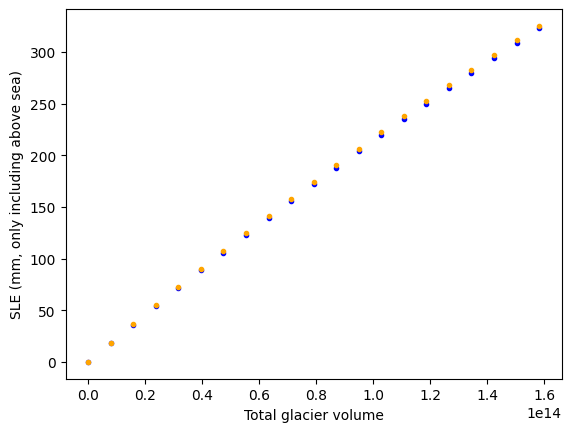

In [60]:
import oggm
df_itmix = pd.read_hdf(oggm.utils.get_demo_file('rgi62_itmix_df.h5'))
# quation as well as the percentage difference:

def vol_tot_to_below_sl(vol_tot):

    ratio = slope_unfilled_m3*vol_tot + intercept_unfilled 
    if ratio <0.7:
        ratio = 0.7
    vol_bsl = vol_tot - vol_tot*ratio
    return vol_bsl 

def compute_slr_jan(v_tot,v_bsl):
    """After Farinotti 2019"""
    rho = 900
    rho_oc = 1028
    A_oc = 362.5 * 1e9
    return (v_tot-v_bsl)* rho / (A_oc * rho_oc)

def compute_slr2_jan(v_tot, v_bsl):
    """slr2"""
    rho = 900
    rho_w = 1000
    A_oc = 362.5 * 1e9
    return (v_tot * (rho / rho_w) - v_bsl) / A_oc
total_slr = compute_slr_jan(df_itmix['vol_itmix_m3'].sum(), df_itmix['vol_bsl_itmix_m3'].sum())
total_slr2 = compute_slr2_jan(df_itmix['vol_itmix_m3'].sum(), df_itmix['vol_bsl_itmix_m3'].sum())


fractions = np.arange(0,1.05,0.05)
for f in fractions:
    vol_tot = df_itmix['vol_itmix_m3'].sum() * f
    total_slr_via_ratio = compute_slr_jan(vol_tot, vol_tot_to_below_sl(vol_tot))
    plt.plot(vol_tot, total_slr_via_ratio,'.', color='blue')
    
    total_slr_via_ratio_2 = compute_slr2_jan(vol_tot, vol_tot_to_below_sl(vol_tot))
    plt.plot(vol_tot, total_slr_via_ratio_2,'.', color='orange')
plt.xlabel('Total glacier volume')

plt.ylabel('SLE (mm, only including above sea)')

$\Delta M_{asl} = M_{2020}\cdot ratio_{M,2020} - M_{ss}\cdot ratio_{M,ss}$


$SLE(mm) = 1000\cdot \frac{\Delta M_{asl}}{\rho_{ocean}}\cdot A_{ocean}$

better approach from Jan: 

$\Delta M_{bsl} = M_{2020}\cdot(1-ratio_{M,2020}) - M_{ss}\cdot(1-ratio_{M,ss})$


$SLE(mm) = 1000\cdot (\frac{\Delta M_{tot}}{\rho_{water}} - \frac{\Delta M_{bsl}}{\rho_{ice}})\cdot A_{ocean}$

In [61]:
total_slr, total_slr2, total_slr_via_ratio

(323.93477635978985, 326.3760936564503, 322.98430151297447)